# Optimal short-time work: Screening for jobs at risk
## Numerical solutions
26/10/2021

### Model setup

- Firm value of an existing job: 
$$ J(\theta, n) =  \theta \times n  - w(\theta, n)   $$
    
    - Assumption: bounded below by $V$: $ J(\theta, n) \geq V$
        - The firm can always leave a negative value job 

- Worker value when employed
    $$ W(\theta, n) = w(\theta, n) - c(n) + \beta \;  \mathbb{E}[W(\theta^\prime, n^\prime) | \theta] $$

- Worker value when unemployed 
    $$ U = b + \overline{W}$$    
    
    - The value of unemployment has two components: 
        - Benefits $b$ - funded by the government while unemployed
        - Value of finding a new job $\overline{W}$

- Firms and workers bargain over the total surplus $S$, defined as

    \begin{align*}
         S(\theta, n) & = (J(\theta, n) + W(\theta, n))  - (V + U)  \\
         &=  (\theta \times n - c(n)) \: - \; U  
    \end{align*}

    - The surplus does not depend on the wage. We can assume that firm and worker first jointly maximize the surplus. 
    - We abstract from how the firm and worker split the surplus    

### Model

We can write the model in terms of the total match surplus of worker and firm as in the paper. We omit the distinction between firm and worker productivity and just take the usual match productivity $\theta$. 
Lets call $S$ the joint maximized surplus. 

$$ S(\theta) = \underset{n \geq 0}{max} \; S(\theta, n) $$


- the ``social costs`` in our problem arise since the government has to fund $b$, and firm and worker dont take this into account
- matches dissolve when the outside option through the unemployment benefits are too high

From $S$ we get hours $n(\theta) = c^{\prime^{-1}}(\theta)$ that the firm and worker choose absent any intervention. Aditionally, they dissolve any match with negative joint surplus, such that the outside option is 

$$ S_O(\theta) = max \{0, S\} $$

The policy maker offers an **alternative surplus** $S_A(\theta, \tilde{\theta})$ with transfers $t(\tilde{\theta})$, hours $n(\tilde{\theta})$ and inclusion $\iota \in \{0,1\}$.

- **Inclusion:** The planner decides whether a match is supported/included or separated. Only in case of separation does the worker search for another job.

$$ S_A(\theta, \tilde{\theta}) =  \iota(\tilde{\theta}) * \left( \theta \times n(\tilde{\theta}) c(n(\tilde{\theta})) \right)  + t(\tilde{\theta}) + (1-\iota(\tilde{\theta}))*\overline{W} -  U  $$

to maximize the following objective: 


- The planner solves joint surplus - marginal costs of public funds
$$ \mathcal{V} = \underset{n(\cdot), t(\cdot) }{\operatorname{max}} \int_\theta  \left(  S_A(\theta) - (1+\tau) t(\theta)   \right) dF(\theta)  $$
    


Subject to the participation constraint (individual rationality, ``IR``)
$$ S_A \geq S_O $$
- participation in a subsidy cannot be forced (unlike e.g. taxation) 
- all matches must be at least as well off as when they decide to not participate

And subject to the Incentive compatibility constraint (``IC``)

$$ S_A(\theta, \theta) \geq S_A(\theta, \tilde{\theta}) \quad \forall \theta, \tilde{\theta} $$
- all matches must report truthfully

- can be written as a differential equation: 
- ``IC:`` $$ \frac{\partial S_A(\theta)}{\partial \theta} = n $$

# Rewriting the model 
``Equations that enter the numerical solution``

- $q \equiv n$ ... old notation, *quantity*
- **As an objective, use**
$$ \mathcal{V} = \underset{q(\cdot), t(\cdot) }{\operatorname{max}} \int_\theta  \left(  S_A  - (1+\tau) t(\theta)    \right) dF(\theta)  $$

- i.e. the **planner maximizes the joint surplus, and uses public funds at excess marginal costs $1+\tau$ to fund transfers to firms.**



In order to use the tools, we write the model in terms of the state $S_A$, control $q$ and an auxilliary final state $S_{A,f}$. 

with 

1. **IC constraint** 

$$ \frac{\partial S_A(\theta)}{\partial \theta} = q $$ 

2. **technical constraint** 

$$ \frac{\partial S_{A,f}(\theta)}{\partial \theta} = S_A - (1+\tau) t(\theta)  $$

3. **hours constraint** 
    
    $$ q \geq 0$$

4. **IR constraints** 

$$ S_A(\theta) \geq 0 $$ 

$$ S_A(\theta) \geq S(\theta)$$



## Setup 

In [ ]:
# !pip install gekko
import gekko
import numpy as np
from scipy import stats
import unittest
import pickle
import os
import matplotlib.pyplot as plt
from scipy import stats
import scipy.integrate as integrate
import scipy.optimize as optimize
from scipy import interpolate


%matplotlib inline

In [ ]:
from STW.model import STW
from STW.plotting import plot_gekko, plot_presi
from STW.calibration import Calibration

## Results

#### Main result: Constraint-optimal (second-best) solution 
- inefficient separations (positive search value)
- flexible participation decision 
- imperfect information

Since the marginal costs of public funds > 1 (MCPF = (1+tau) here), the planner would use the public funds to change the allocation and keep some workers in STW. The reason is that the joint-surplus-maximizers are not taking into account that the value of unemployment has to be funded by the public. 

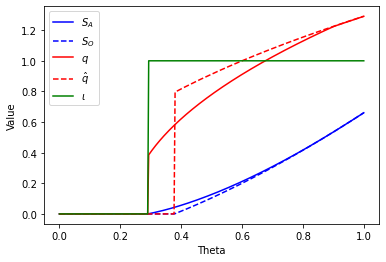

0.13107695517


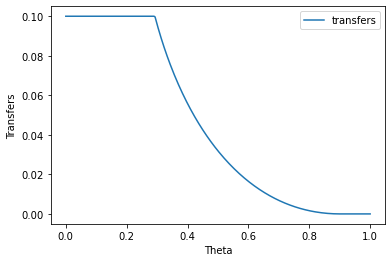

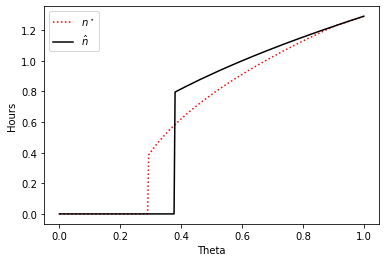

In [ ]:
stw = STW(display = False, A=0.2, U = 0.2, search = 0.1, beta = 0.0, tau = 0.5, phi = 3.0, 
          qup = 2, nt = 301, information = "imperfect", participation = "flex")
stw.init_gekko()
stw.solve_gekko()
plot_gekko(stw)

plot_presi(stw, "transfers")
plot_presi(stw, "n")
# objective value
print(stw.value[-1]) # 3.0423, 1.203

Text(0.5, 1.0, 'Transfer as a function hours')

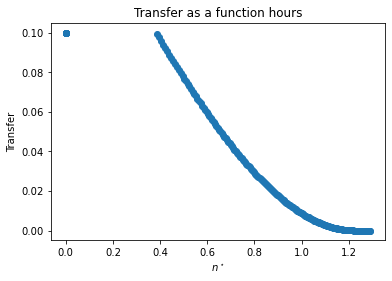

In [ ]:
# Transfers as a function of hours
plt.scatter(stw.q, stw.t)
plt.xlabel("$n^\star$")
plt.ylabel("Transfer")
plt.title("Transfer as a function hours")

C:\Users\szuzek\AppData\Local\Temp/ipykernel_15944/2356653.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter((np.array(stw.q)-np.array(stw.qhat))/np.array(stw.qhat), stw.t)
C:\Users\szuzek\AppData\Local\Temp/ipykernel_15944/2356653.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter((np.array(stw.q)-np.array(stw.qhat))/np.array(stw.qhat), stw.t)


Text(0.5, 1.0, 'Transfer as a function of relative reduction in labor')

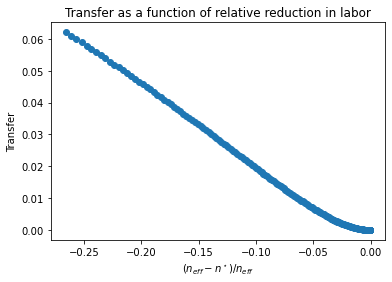

In [ ]:
# Transfers as a function of relative reduction of hours

plt.scatter((np.array(stw.q)-np.array(stw.qhat))/np.array(stw.qhat), stw.t)
plt.xlabel("($n_{eff}-n^\star)/n_{eff}$")
plt.ylabel("Transfer")
plt.title("Transfer as a function of relative reduction in labor")

#### Comparison: Perfect information
Hours which the planner chooses in the perfect information (first-best) solution 
- inefficient separations
- flexible participation
- perfect information

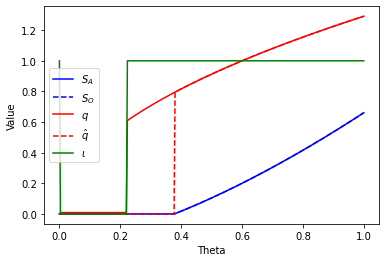

0.14424285181


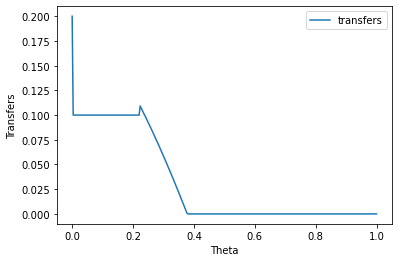

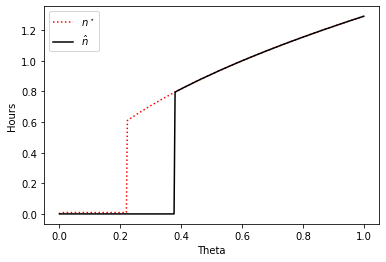

In [ ]:
stw = STW(display = False, A=0.2, U = 0.2, search = 0.1, beta = 0.0, tau = 0.5, phi = 3.0, 
          qup = 2, nt = 301, information = "perfect", participation = "flex")
stw.init_gekko()
stw.solve_gekko()
plot_gekko(stw)
# plot_presi(stw, "transfers")
# plot_presi(stw, "iota")

plot_presi(stw, "transfers")
plot_presi(stw, "n")

# objective value
print(stw.value[-1]) # 3.0423, 1.203

#### Comparison: Imperfect information without inefficient separations - everyone has to participate
* ``search = 0``
* imperfect information
* forced participation



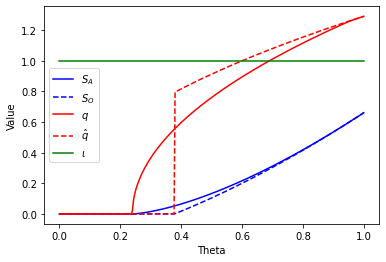

In [ ]:
stw = STW(display = False, A=0.2, U = 0.2, search = 0, beta = 0.0, tau = 0.5, phi = 3, 
          qup = 5, nt = 301, information = "imperfect", participation = "forced")
stw.init_gekko()
stw.solve_gekko()
plot_gekko(stw)

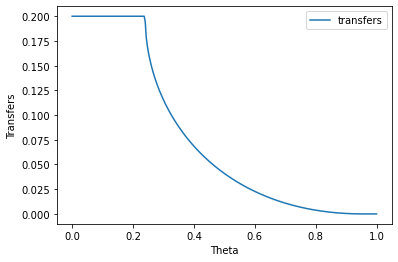

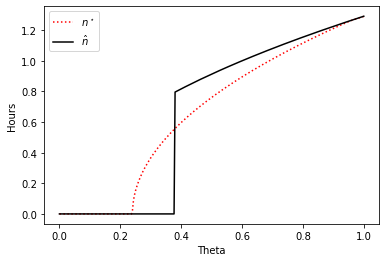

In [ ]:
plot_presi(stw, "transfers", fname = "plots/transfers.png")
plot_presi(stw, "n", fname = "plots/hours.png")

# stw.moments()

# objective value
# print(stw.value[-1])

0.2659528711

#### Perfect information 
- What the planner would do under perfect information: 
- From the perspective of the planner, jobs with a lower surplus are still valuable since the planner pays for unemployment benefits. 
- I.e., the part of the surplus that comes from the outside option of the worker is "bad" from the perspective of the planner, since the planner funds this outside option.

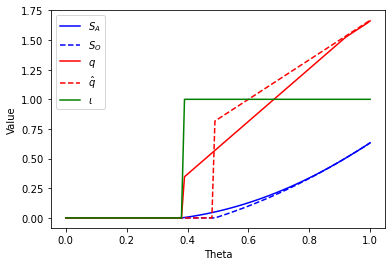

0.070469300161


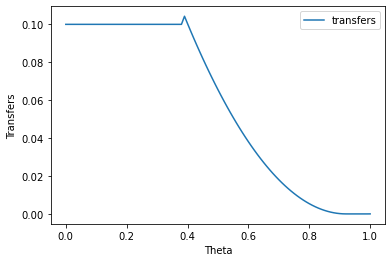

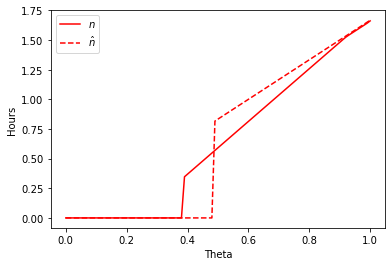

In [ ]:
stw = STW(display = False, A=0.3, U = 0.2, beta = 0, tau = 0.5, phi = 2, qup = 2, information = "imperfect", participation= "flex", search = 0.1)
stw.init_gekko()
stw.solve_gekko()
plot_gekko(stw)

plot_presi(stw, "transfers") 
plot_presi(stw, "n")

# objective value
print(stw.value[-1])

nperfect = stw.q

## Calibration

Calibration of our model

#### Model equations without optimal STW

We want to fit the paramters of the model to a world without STW. 

Cooper et al 2017 calibrate their model to Germany prior to 2008, where STW played almost no role.



The relevant equations come from the outside options of firms

$$ S_O(\theta) = \underset{n \geq 0}{max} \quad \mathbb{1}_{\{ n > 0 \}}(n) \: \times \:  \left( \theta \: n - c(n) \: - U \right)  $$
With solution of hours $ \hat{n}(\theta) $.

$\theta$ is a shock that we assume to be log-normally distributed **(check that. lognormal does not have monotone hazard rate under some paramters!!)**

There are some major deviations to Cooper et al 2017: 
- We do not have multi-worker firms
    - That should not be a big issue. it just means less moments to target
- We do not track job finding rates etc, and dont talk about job creation etc
    - As long as we dont claim any results for that, it should be fine. We have a partial EQ model. 
    - **We cannot target unemployment**, since we dont have outflows of unemployment. Instead, our model corresponds more to job separation rates

#### Discussion of Moments
- distribution of hour-changes 
    - 25%, 50%, 75% quantiles
    - informative about cost of labor
    - see inaction share
- Average job separation rate 
    - OECD report (Bart and Sahin 2007): **monthly 1.06%** (i.e. **around 12% yearly**) (Germany, 1992-2004)
- Value of unemployment relative to production **(not very good)**
    - Workers are promised around 60% of wages
    - In our model, wages are not solved for
    - But they should on average be equal to labor share! 
    - use $\mathbb{E}[production] * laborshare * replacement rate = \mathbb{E}[production] * 0.63 * 0.6$ 
- Inaction share: number of firms with low hour adjustment
    - $\Delta h < |5\%|$ (annual) = 47.6%
    - share of firms that adjust hours only a little. should be informative about the slope and scale of the cost function
- Normal hours
    - we need to normalize hours in order to talk about a deviation. I.e., we target that 47% of firms adjust within 5% deviation of the normal hours
    - set to 1
    - specifically: 47% of *continuing* firms
- Distribution
    - set to log-normal (for a start)
    - careful: log-normal does not always have montone hazard rate!
    - parameter $\mu$ and $\sigma$ need to be calibrated


#### Pdf

$$ f(x) = \frac{1}{x*\sigma * \sqrt{2 \pi}} exp \left( - \frac{log(x - loc)^2}{2 \sigma^2} \right)$$


#### Overview of moments

| **Name**           | **formally**                              | **Moment** | **Target**         |
| ------------------ | ----------------------------------------- | -----------| ------------------ |
| Inaction share     | less than 5\% deviation from normal hours **check!** | 0.538      | $\phi$             |
| Normal hours       | normalization of what normal hours are    | 1          | $A$                |
| Separation rate    | Share of existing matches that separate   | 0.12       | lognormal $\sigma$ |
| Unemployment value | Labor-share x replacement rate x av. prod | 0.378      | $U$                |
| Average theta      | normalize expectation of $\theta$         | 1          | lognormal loc      |


#### Calibration equations

In the outside option, each match solves 
$$ \hat{n}(\theta) = argmax_{n\geq 0} \; \mathbb{1}_{n>0}(n) \left( \theta * n - A * n^\phi - U \right) $$

with $\theta \sim LogNormal(loc, \sigma)$.

Direct FOC solution for n: 
$$ n_{FOC}(\theta) = \left( \frac{\theta}{A*\phi} \right)^{ 1/(\phi-1) } $$

Cutoff $\theta_0$ solves: 

$$ \theta  n_{FOC}(\theta_0) - A *  n_{FOC}(\theta_0)^\phi - U = 0 $$

Explicitly: 

$$ \theta_0 = \left( \left( \frac{1}{\phi A} \right)^{\frac{1}{\phi-1}} - A * \left( \frac{1}{\phi A} \right)^{\frac{\phi}{\phi-1}}  \right)^{\frac{1-\phi}{\phi}} * U^{\frac{\phi-1}{\phi}}  $$

Given $\hat{n}$, the following equations should be satisfied: 

**Conditional on...**

- Inaction share: $\int_{\theta_0} \mathbb{1}_{ |\hat{n} - 1 | \leq 0.05 }(\hat{n}) \; dF(\theta) = 0.538 $
- Normal hours: $\int \hat{n}(\theta) \; dF(\theta) = 1$
- Separation rate: $ \int \mathbb{1}_{\hat{n} = 0 }(\hat{n}) \; dF(\theta) = 0.12$
- Unemployment value: $U = 0.378$
- Average theta: $ \int \theta dF(\theta) = 1$


#### Numerical approximations

With log-normal distribution, the support of $\theta$ is infinite. 
For numerical purposes, the lower and upper bound are set such that 99.99% of the support of $\theta$ is covered. 

- lower = dist.ppf(0.99995)
- upper =  dist.ppf(0.00005)

The upper bound of hours also has to be set. There is no way of seeing that beforehand. One has to check that the artificial upper bound is not reached in the solution.

- qup = X (check with solution that it is sufficiently high!)



#### Counterfactual

The counterfactual is a Germany prior to Great Recession with an optimal STW.
We look at the following moments: 
- ounterfactual separation rate, 
- average hour reduction (%) for STW users
- ratio of transfers to jobs below vs. above theta_0
- % reduction of total expenditure

#### Adding inefficient separation

- We already target a separation rate of 12%.

- Lets add the notion of **efficient unemployment rate** of 4% anually. The actual unemployment rate in Germany during that period was 


#### Calibration

``NOTE:`` The calibration uses analytical solutions for outside option hours and the cutoff $\theta_0$. If the model changes, these have to be adapted!

In [ ]:
# directly set moments
U_calib = 0.378
c = Calibration(Ucalib = U_calib, distributionname = "lognormal", target_sep_eff = 0.04, target_sep = 0.12)
# c.loss([2, 0.6, 0.1])
# [2, 0.6, 0.1]

#### Calibration - Estimation

In [ ]:
o = c.optimize()

C:\Users\szuzek\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2738: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  vals = integrate.quad(fun, lb, ub, **kwds)[0] / invfac


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 133
         Function evaluations: 229


save result objects

In [ ]:
with open( "calibration_params.pkl", 'wb') as file:
    pickle.dump(o, file)
with open( "calibration_class.pkl", 'wb') as file:
    pickle.dump(c, file)

#### Calibration - OUTPUT

load previous

In [ ]:
with open('calibration_params.pkl', 'rb') as f:
    o = pickle.load(f)
with open('calibration_class.pkl', 'rb') as f:
    c = pickle.load(f)

Check validity

In [ ]:
finalparams = o.x # phi, A, sigma, SEARCH
print(finalparams)
print(c.evaluate(finalparams))
print(c.evaluate_STW(finalparams)) # also initializes c.stw_, the STW object with finalparams

[7.38277336 0.13643055 0.44487405 0.26158814]
[-2.90519746e-06 -7.21434070e-07  9.67471820e-08 -2.02292145e-06]


C:\Users\szuzek\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2738: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  vals = integrate.quad(fun, lb, ub, **kwds)[0] / invfac


[ 7.58496148e-05  8.24944228e-07  9.95105242e-08 -4.00000000e-02]


## Optimal Short-time work policy on calibrated economy

In [ ]:
c.stw_.display = False
c.stw_.nt = 2001 # need to increase precision since few are affected by stw
c.stw_.init_gekko()
c.stw_.solve_gekko()

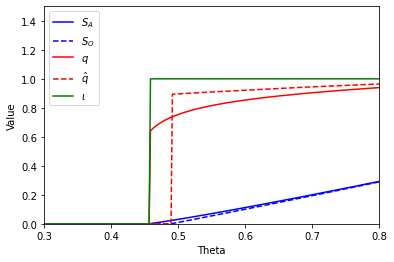

In [ ]:
plot_gekko(c.stw_, xlim = [0.3, 0.8], ylim = [0, 1.5]) # zoom in on the area where the action is


Plot distribution and cutoffs

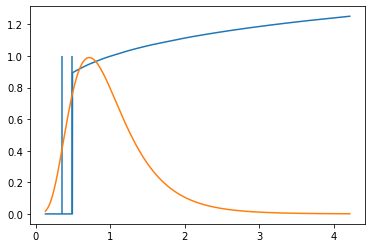

In [ ]:
plt.plot(c.stw_.theta, c.stw_.qhat)
plt.plot(c.stw_.theta, c.stw_.f)
plt.vlines(c.theta0, 0, 1)
plt.vlines(c.thetaeff, 0, 1)

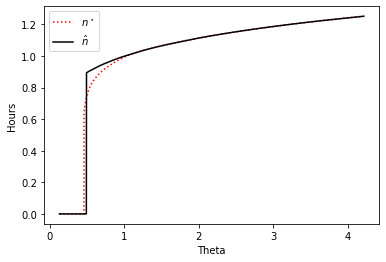

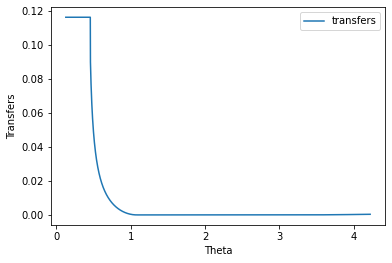

In [ ]:
plot_presi(c.stw_, which = "n")
plot_presi(c.stw_, which = "transfers")

Model moments of the calibrated economy

In [ ]:
print(c.target_sep_eff)
mom = c.stw_.moments(cutoff = 0.05)
print(mom)

print(f"share of transfers to STW policy", np.round(mom["transfer_STW"]/ (mom["transfer_UI"] + mom["transfer_STW"]),3))


0.04
{'separation_rate': 0.0963005856434701, 'separation_rate_oo': 0.12001164527858459, 'total_transfers': 0.01849697893041245, 'total_transfers_oo': 0.013970778905774776, 'total_output': 0.9733697783863632, 'total_output_oo': 0.9789578463375098, 'transfer_STW': 0.0056877626969324725, 'transfer_UI': 0.012801087253198593, 'share_in_STW': 0.17388041999735124}
share of transfers to STW policy 0.308


#### Check that the hazard rate is monotone

Text(0.5, 1.0, 'Check Hazard Rates (monotonicity)')

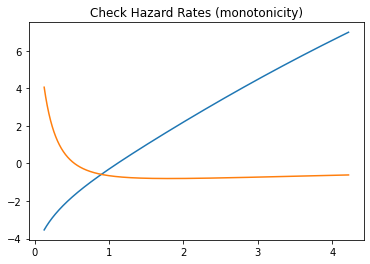

In [ ]:
grid = np.array(c.stw_.theta)
hr1 = c.dist.cdf(grid) / c.dist.pdf(grid)  # F/f
hr2 = (1-c.dist.cdf(grid))/ c.dist.pdf(grid) # (1-F)/f

plt.plot(grid, np.log(hr1))
plt.plot(grid, np.log(hr2))
plt.title("Check Hazard Rates (monotonicity)")

## Test with analytical solution

$$    \psi(x) = F^{-1}\left((x-c'(0))\frac{1+\tau}{\tau}f(x) + F(x)\right).$$

$$     n^*(\theta) = c'^{-1}\left(\theta - \frac{\tau}{1+\tau}\frac{\psi(\theta_1) - F(\theta)}{f(\theta)}\right)
 $$ 

$$\chi(\theta_1) \equiv \int_{\theta_1}^{\psi(\theta_1)} n^*(\theta) d\theta -  \int_{\theta_0}^{\psi(\theta_1)} c'^{-1}(\theta) d\theta$$

#### TestCase

In [ ]:
class Testfunctions():
    def intervall_approx(stw, eps = 0.01):
        ''' Find the upper and lower bound of the interval where state != outside option 
        Careful: Beware of the approximation error! 
        '''
        # notbinding = np.array(stw.theta)[np.abs(np.array(stw.sa) - np.array(stw.oo)) > eps]
        notbinding = np.array(stw.theta)[np.abs(np.array(stw.q) - np.array(stw.qhat)) > eps]
        oo_larger_zero = np.array(stw.theta)[np.abs(np.array(stw.oo)) > eps/100]

        theta1 = notbinding[0]
        theta2 = notbinding[-1]
        theta0 = oo_larger_zero[0]
        return theta1, theta2, theta0
    
    def intervall_approx(stw, eps = 0.01):
        ''' Find the upper and lower bound of the interval where state != outside option 
        Careful: Beware of the approximation error! 
        '''
        # notbinding = np.array(stw.theta)[np.abs(np.array(stw.sa) - np.array(stw.oo)) > eps]
        notbinding = np.array(stw.theta)[np.abs(np.array(stw.q) - np.array(stw.qhat)) > eps]
        oo_larger_zero = np.array(stw.theta)[np.abs(np.array(stw.oo)) > eps/100]

        theta1 = notbinding[0]
        theta2 = notbinding[-1]
        theta0 = oo_larger_zero[0]
        return theta1, theta2, theta0
    
    def nstarfunction_uniform(theta, theta1, stw):
        A, phi, tau = stw.A, stw.phi, stw.tau
        x = theta -  tau/(1+tau) * (Testfunctions.psifunction_uniform(theta1, stw) - theta)
        nstar = (x/(phi*A))**(1/(phi-1))
        return nstar

    def psifunction_uniform(x, stw):
        def F(x): return x 
        def f(x): return np.ones(1)
        def Finv(x): return x
        tau = stw.tau
        cprimezero = 0
        return Finv((x-cprimezero)*((1+tau)/tau) * f(x) + F(x))[0]
    
    def cprimeinverse(x, stw): 
        A, phi = stw.A, stw.phi
        return (x/(phi*A))**(1/(phi-1))

    def Xi_uniform(theta1, stw): 
        ''' Setup theta1 as a root finding problem
        '''
        _, _, theta0 = Testfunctions.intervall_approx(stw, eps = 0.001)
        theta2 = Testfunctions.psifunction_uniform(theta1, stw)
        integral1, _ = integrate.quad(lambda x: Testfunctions.nstarfunction_uniform(x, theta1, stw), theta1, theta2)
        integral2, _ = integrate.quad(lambda x: Testfunctions.cprimeinverse(x, stw), theta0, theta2)

        return np.abs(integral1 - integral2)
    
    def theta1function_old(stw): 
        A = stw.A*2
        tau = stw.tau
        U = stw.U
        divisor = ((1/(2*A)) * ( ((1+2*tau)/tau)**2 - (1+2*tau)**3/(tau*tau*(1+tau)) + 2* (1+2*tau)**2/(tau*(1+tau)) + (1+2*tau)/(1+tau) - 2*(1+2*tau)/(1+tau)  )     )
        # divisor = ((1/(2*A)) * ( ((1+2*tau)/tau)**2 - (1+2*tau)**2/(tau*(1+tau)) + 2* (1+2*tau)**2/tau + (1+2*tau)/(1+tau) - 2*(1+2*tau)/(1+tau)  )     )
        # divisor = ((1/(2*A)) * (((1+2*tau)/tau)**2 - ((1+2*tau)/tau)*(1+2*tau)/(1+tau) + 2*(1+2*tau)**2/tau + (1+2*tau)/(1+tau) - 2*(1+2*tau)/(1+tau)))
        # divisor = ((1/(2*A)) * (((1+tau)/tau)**2 - ((1+tau)/tau**2)*(1+2*tau) + 2*(1+tau)/tau + (1+2*tau)/(1+tau) - 2))
        return np.sqrt((U/(2-A**2)) / divisor)
    
    def plot_xi_parts(stw, lower, upper):
        _, _, theta0 = Testfunctions.intervall_approx(stw, eps = 0.001)

        def left(theta1): 
            return integrate.quad(lambda x: Testfunctions.nstarfunction_uniform(x, theta1, stw), theta1, Testfunctions.psifunction_uniform(theta1, stw))
        def right(theta1):
            return integrate.quad(lambda x: Testfunctions.cprimeinverse(x, stw), theta0, Testfunctions.psifunction_uniform(theta1, stw))

            
        grid = np.linspace(lower, upper, 501)
        plt.plot(grid, [left(x)[-1]  for x in grid], label = "nstar_integral")
        plt.plot(grid, [right(x)[-1]  for x in grid], label = "nhat_integral")
        # plt.plot(grid, [Testfunctions.psifunction_uniform(x, stw) for x in grid])
        plt.legend()
        plt.xlabel('Theta')



In [ ]:
class stwTestCase(unittest.TestCase):
    
    # called before each test
    def setUp(self):
        stw = STW(display = False, A=0.1, U = 0.3, cont = 0.0, beta = 0.0, tau = 0.5, phi = 2.0, qup = 7, nt = 1001, search = 0, participation = "forced") # run our solution
        stw.init_gekko()
        stw.solve_gekko()
        self.stw = stw
        
        self.theta1, self.theta2, self.theta0 = Testfunctions.intervall_approx(self.stw, eps = 0.005)
        self.thetas = np.array(self.stw.theta.value)
    

    def testNstar(self): 
        # given 
        theta1, theta2, thetas = self.theta1, self.theta2, self.thetas 
        interval = (thetas>theta1) & (thetas<theta2)
        nstar = Testfunctions.nstarfunction_uniform(thetas[interval], theta1, self.stw)
        nhat = np.array(self.stw.q.value)[interval]
        
        # margin
        NstarEps = 0.01

        # then
        self.assertLess(np.max(np.abs(nstar - nhat)), NstarEps)
        
    def testPsiFunction(self):
        # given 
        theta1, theta2 = self.theta1, self.theta2 
        # when
        theta2approx = Testfunctions.psifunction_uniform(theta1, self.stw)
        # then
        self.assertLess(np.abs(theta2 - theta2approx), 0.01)
    
    def testTheta1(self):
        # given
        theta1 = self.theta1

        #when
        opt = optimize.fsolve(lambda x: Testfunctions.Xi_uniform(x, self.stw), 0.3)
        
        self.assertLess(np.abs(self.theta1 - opt), 0.01)
    
    def testTheta2differentFromUpperBound(self):
        ''' Test if theta2 is different from the upper bound. Only a numerical problem sometimes due to imprecision 
        '''
        # given 
        theta2 = self.theta2
        # when
        
        # then
        self.assertGreater(np.abs(theta2 - self.stw.upper), 0.02)
    
    def testHoursBelowUpperBound(self):
        ''' Important: qup has to be set high enough for interior solutions!'''
        # given
        highestq = np.max(np.array(self.stw.q.value))
        qup = np.array(self.stw.qup)
        # then
        self.assertLess(highestq, qup - 0.01)
        
    
unittest.main(argv=[''], verbosity=2, exit=False)

testHoursBelowUpperBound (__main__.stwTestCase)
Important: qup has to be set high enough for interior solutions! ... ok
testNstar (__main__.stwTestCase) ... ok
testPsiFunction (__main__.stwTestCase) ... ok
testTheta1 (__main__.stwTestCase) ... ok
testTheta2differentFromUpperBound (__main__.stwTestCase)
Test if theta2 is different from the upper bound. Only a numerical problem sometimes due to imprecision ... ok

----------------------------------------------------------------------
Ran 5 tests in 67.510s

OK


# Export to html

In [ ]:
!jupyter nbconvert --to html main.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook main.ipynb to html
[NbConvertApp] Writing 954561 bytes to main.html
